In [8]:
import numpy as np
import pandas as pd

In [9]:
names = ['user', 'activity', 'timestamp', 'x-accel', 'y-accel', 'z-accel', "NaN"]

data = pd.read_csv("../../../dataset/WISDM_ar_v1.1 2/WISDM_ar_v1.1_raw.txt", header=None, names=names, comment=";")

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

data_new = data.drop('NaN', axis=1)
data_new["z-accel"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
data_new["z-accel"] = data_new["z-accel"].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss will show up as NAN
data_new.dropna(axis=0, how='any', inplace=True)

data_new.head()

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_3995/1680644122.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(x)


,user,activity,timestamp,x-accel,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [10]:
print(data_new.shape)

(1098203, 6)


<Axes: title={'center': 'Count Rows of Activity'}>

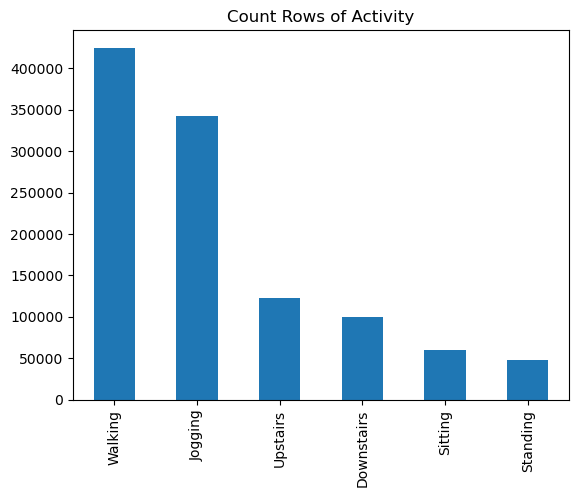

In [11]:
data_new["activity"].value_counts().plot(kind="bar", title="Count Rows of Activity")

In [12]:
data_new.dropna(axis=0, how='any', inplace=True)

classes = ['Walking', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Downstairs']

TIME_PERIOD = 80
STEP_DISTANCE = 40

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data_new["ActivityEncoded"] = le.fit_transform(data_new["activity"].values.ravel())

In [14]:
data_new

,user,activity,timestamp,x-accel,y-accel,z-accel,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,2
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,2
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,2
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,2


In [15]:
df_train = data_new[data_new['user'] <= 28]
df_test = data_new[data_new['user'] > 28]

df_train.shape, df_test.shape

((834780, 7), (263423, 7))

In [16]:
df_train['x-accel'] = df_train['x-accel'] / df_train['x-accel'].max()
df_train['y-accel'] = df_train['y-accel'] / df_train['y-accel'].max()
df_train['z-accel'] = df_train['z-accel'] / df_train['z-accel'].max()

df_train = df_train.round({'x-accel' : 4, 'y-accel' : 4, 'z-accel' : 4})

df_train

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_3995/2486403702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['x-accel'] = df_train['x-accel'] / df_train['x-accel'].max()
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_3995/2486403702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y-accel'] = df_train['y-accel'] / df_train['y-accel'].max()
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_3995/2486403702.py:3: SettingWithCopyWarning: 
A value is t

,user,activity,timestamp,x-accel,y-accel,z-accel,ActivityEncoded
8489,17,Walking,57869902574000,0.0287,0.4894,-0.0271,5
8490,17,Walking,57870012316000,-0.0000,0.5084,-0.0292,5
8491,17,Walking,57870122301000,-0.0116,0.4914,-0.0354,5
8492,17,Walking,57870222246000,0.0075,0.5029,-0.0257,5
8493,17,Walking,57870332292000,0.0075,0.5063,-0.0313,5
...,...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,0.4511,-0.0783,0.0862,2
1098200,19,Sitting,131623371431000,0.4531,-0.0729,0.0882,2
1098201,19,Sitting,131623411592000,0.4551,-0.0689,0.0862,2
1098202,19,Sitting,131623491487000,0.4511,-0.0729,0.0882,2


In [17]:
from scipy import stats

def create_segments_and_labels(df, time_steps, step, label_name):
    N_FEATURES = 3

    segments = []
    labels = []

    for i in range(0, len(df) - time_steps, step):
        xs = df['x-accel'].values[i : i+time_steps]
        ys = df['y-accel'].values[i : i+time_steps]
        zs = df['z-accel'].values[i : i+time_steps]

        label = stats.mode(df[label_name][i : i+time_steps])[0][0]
        # df[label_name][i : i + time_steps]의 최빈값 찾기
        # df의 time_step(80)만큼 묶어서 데이터를 만드는데, 
        # 이는 80개 데이터를 묶어서 만든 새로운 데이터를 대표하는 카테고리를 찾는 것이다. (가장 많이 나오는 카테고리를 취한다.)
        # 웬만하면 카테고리 별로 데이터가 묶이는데, 카테고리가 바뀌는 경계값에서 발생하는 예외를 잡기 위함임.
        segments.append([xs, ys, zs])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    # https://yganalyst.github.io/data_handling/memo_5/ 참고
    # x-accel, y-accel, z-accel을 각각 80개씩 묶은 데이터를 한데 모은 데이터를 time_steps(80)만큼씩 묶는 배열로 만든다. (높이, 행, 열) => (auto, time_steps, 피쳐의 개수)
    labels = np.asarray(labels)

    return reshaped_segments, labels

x_train, y_train = create_segments_and_labels(df_train, TIME_PERIOD, STEP_DISTANCE, "ActivityEncoded")
    

In [18]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print("Number of columns in the dataframe: %i" % (dataframe.shape[1]))
    print("Number of rows in the dataframe: %i\n" % (dataframe.shape[0]))

show_basic_dataframe_info(data_new)
data_new.head(20)

Number of columns in the dataframe: 7
Number of rows in the dataframe: 1098203



,user,activity,timestamp,x-accel,y-accel,z-accel,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526,1
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926,1
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340,1
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871,1
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062,1


<Axes: xlabel='activity', ylabel='count'>

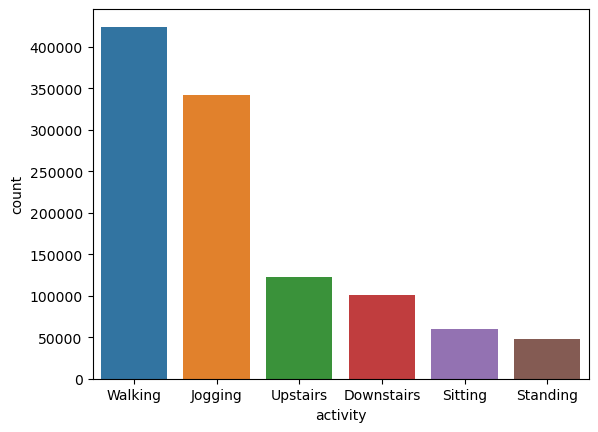

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'activity', data=data_new, order=data_new.activity.value_counts().index)

Text(0.5, 1.0, 'Records per user')

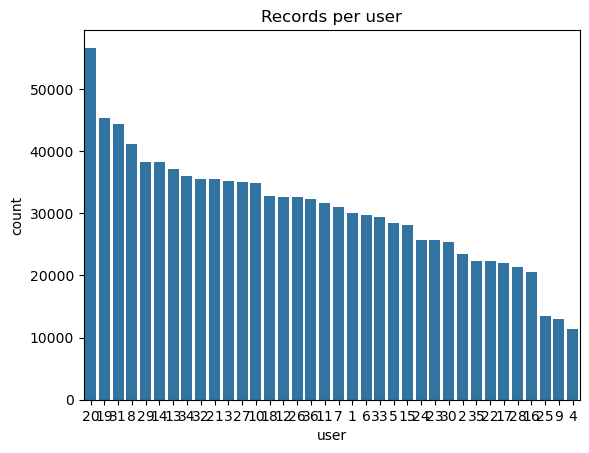

In [20]:
sns.countplot(x='user', data=data, palette=[sns.color_palette()[0]],
              order=data.user.value_counts().index)
plt.title('Records per user')

In [21]:
print(x_train.shape, y_train.shape)
print(x_train[0].shape)

(20868, 80, 3) (20868,)
(80, 3)


In [22]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']


In [23]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [24]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []

    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i : (i + time_steps)].values
        labels = y.iloc[i : i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])

    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_train, y_train = create_dataset(df_train[['x-accel', 'y-accel', 'z-accel']], df_train.activity, TIME_STEPS, STEP)
X_test, y_test = create_dataset(df_test[['x-accel', 'y-accel', 'z-accel']], df_test.activity, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(20865, 200, 3) (20865, 1)


In [25]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
# y_train의 범주 찾기 (어떻게 변환할 것인지 학습하기)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)
# 카테고리를 숫자로 변환.

print(X_train.shape, y_train.shape)

(20865, 200, 3) (20865, 6)


/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, BatchNormalization

model = Sequential([
    Conv1D(filters=64, kernel_size=5, strides=2, activation='relu', input_shape=(n_timesteps, n_features)),
    MaxPooling1D(pool_size=2, strides=2),
    Conv1D(filters=96, kernel_size=3, strides=1, activation='relu'),
    MaxPooling1D(pool_size=2, strides=1),
    Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'),
    GlobalAveragePooling1D(),
    BatchNormalization(),
    Dense(n_outputs, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            1024      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 96)            18528     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 46, 96)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 44, 32)            9248      
                                                                 
 global_average_pooling1d (G  (None, 32)               0

In [28]:
import pydot
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='CNN_Model.png')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from scipy import ndimage
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
from keras.layers import BatchNormalization, ReLU, GlobalAveragePooling1D, MaxPooling1D, LSTM, TimeDistributed
from tensorflow.keras.models import save_model, load_model
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, save_model, load_model
from keras.layers import Input
from keras.layers.merge import concatenate

from datetime import datetime
from packaging import version

import os
import tempfile
import tensorflow as tf
from tensorflow import expand_dims
from tensorflow import keras

ModuleNotFoundError: No module named 'keras.layers.merge'